In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
visa_df=pd.read_csv('Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [2]:
cat_col=[key for key,value in visa_df.dtypes.items() if value=='object']
num_col=[key for key,value in visa_df.dtypes.items() if value!='object']
cat_col

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [3]:
num_col

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

**Boxplot**

- blox plot is used to identify the outliers

- outliers is an observations having huge positive value or huge negative value

- Q1=25p , Q2=50p , Q3=75p

- IQR = inter quartile range = Q3-Q1

- Q3+1.5*IQR and Q1-1.5*IQR

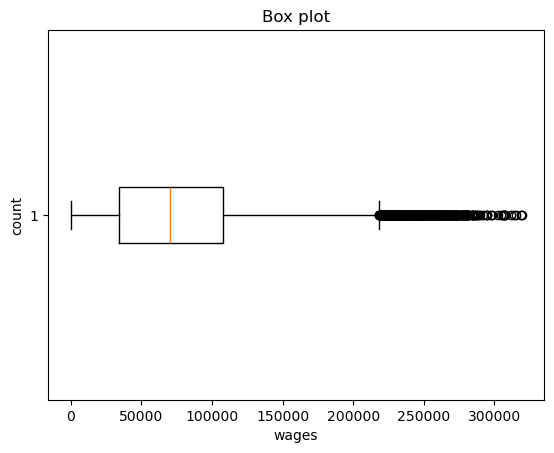

In [4]:
plt_with_outliers=plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.title('Box plot')
plt.xlabel('wages')
plt.ylabel('count')
plt.show()

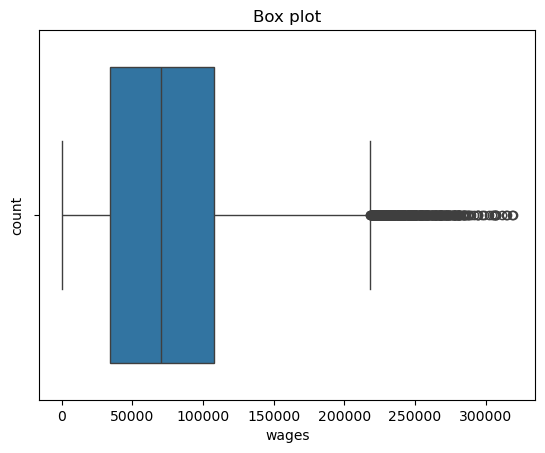

In [5]:
sns.boxplot(data=visa_df,x='prevailing_wage')
plt.title('Box plot')
plt.xlabel('wages')
plt.ylabel('count')
plt.show()

**Plotting distribution plot(histogram) side by side**

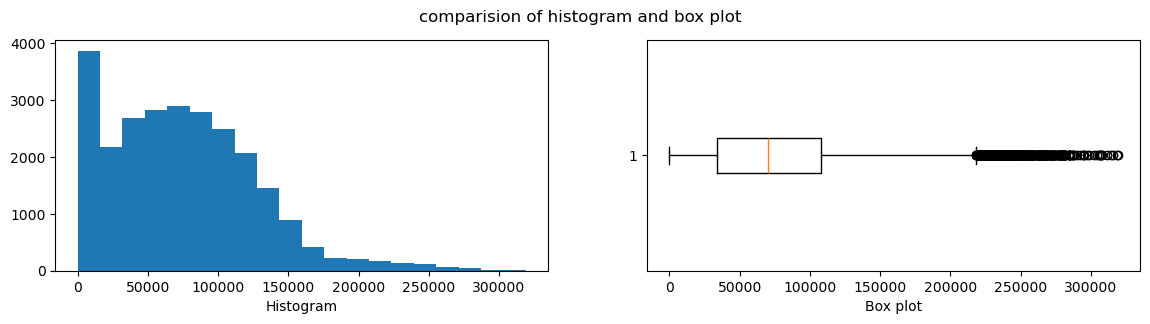

In [6]:
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram and box plot')
plt.subplot(1,2,1)
plt.hist(visa_df['prevailing_wage'],bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.xlabel('Box plot')
plt.show()

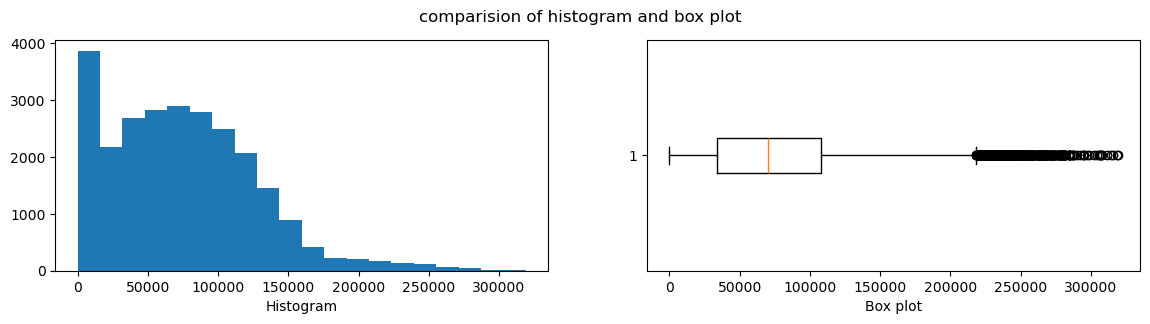

In [7]:
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram and box plot')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'],bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.xlabel('Box plot')
plt.show()

**Finding the outliers**

- we alredy know that outliers available less than Q1-1.5*IQR and Q3-1.5*IQR

- step-1 :

  - calculate Q1=25p
 
  - calculate Q2=50p
 
  - calculate Q3=75p

- step-2 :

  - calculate IQR
 
  - IQR = Q3-Q1

- step-3 :

  - calculate lower bound =Q1-1.5*IQR
 
  - calculate upper bound =Q3+1.5*IQR

- step-4 :

  - con1=wage data<lb
 
  - con2=wage data>ub
 
  - con3=con1 or con2

- step-5:

  - get the data 

In [8]:
# step-1
q1=np.quantile(visa_df['prevailing_wage'],0.25)
q2=np.quantile(visa_df['prevailing_wage'],0.50)
q3=np.quantile(visa_df['prevailing_wage'],0.75)
# step-2
iqr=q3-q1
# step-3
lb=q1-1.5*iqr
ub=q3+1.5*iqr
# step-4
con1=visa_df['prevailing_wage']<lb
con2=visa_df['prevailing_wage']>ub
con3=con1|con2 # bitwise operator used to compare bits data
# bits data ==== 0 and 1 ==== True False
# step-5
outlier_data=visa_df[con3]
outlier_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [9]:
visa_df['prevailing_wage'][con3]

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [10]:
con4=visa_df['prevailing_wage']>lb
con5=visa_df['prevailing_wage']<ub
con6=con4&con5
non_outlier_df=visa_df[con6]
non_outlier_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [11]:
visa_df['prevailing_wage'][con3]

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

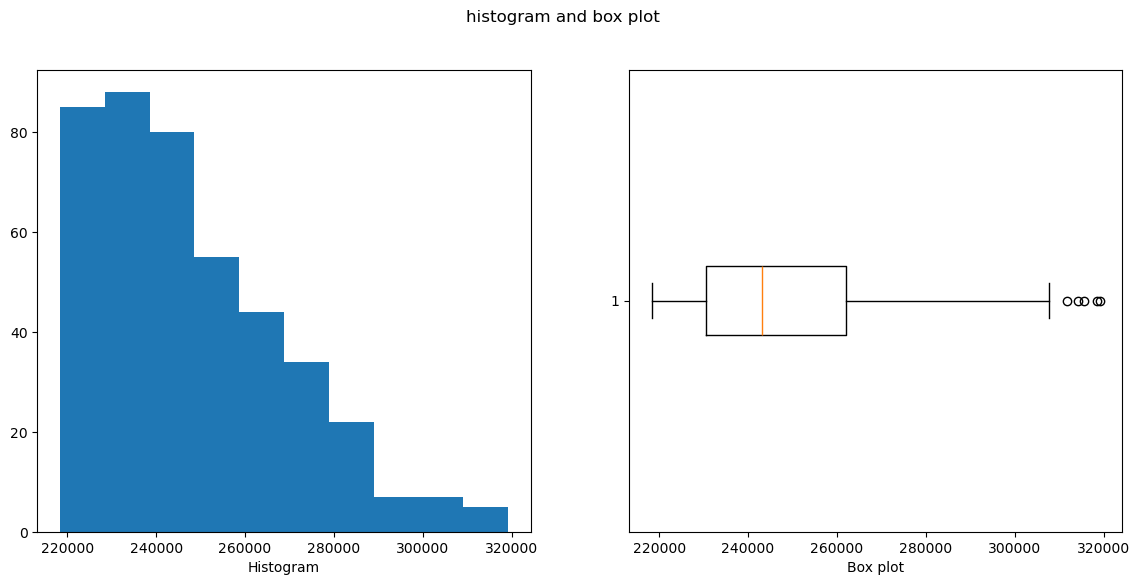

In [12]:
plt.figure(figsize=(14,6))
plt.suptitle('histogram and box plot')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'][con3])
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'][con3],vert=False)
plt.xlabel('Box plot')
plt.show()

In [13]:
non_outlier_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

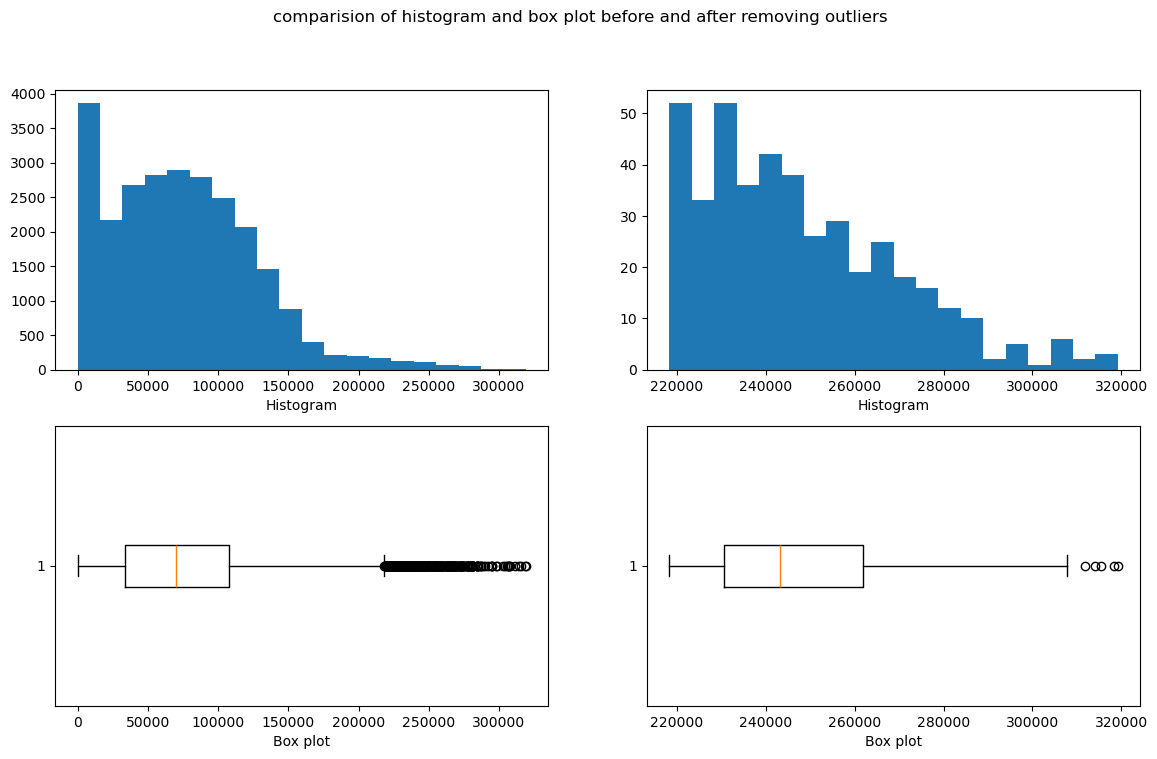

In [14]:
plt.figure(figsize=(14,8))
plt.suptitle('comparision of histogram and box plot before and after removing outliers')
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).hist(visa_df['prevailing_wage'][con3],bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,3).boxplot(visa_df['prevailing_wage'],vert=False)
plt.xlabel('Box plot')
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'][con3],vert=False)
plt.xlabel('Box plot')
plt.show()

In [15]:
outlier_list=list(outlier_data['prevailing_wage'])
len(outlier_list)

427

In [16]:
Median=visa_df['prevailing_wage'].median()
Median_list=[round(Median,2) for _ in range(len(outlier_data))]
len(Median_list)

427

In [17]:
# visa_df.replace(list(visa_df['prevailing_wage'][con3]),Median_list,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x24091fb4b50>,
 'caps': [<matplotlib.lines.Line2D at 0x24091fb6110>,
 'boxes': [<matplotlib.lines.Line2D at 0x24091f7b350>],
 'medians': [<matplotlib.lines.Line2D at 0x24091fb7710>],
 'fliers': [<matplotlib.lines.Line2D at 0x24091fc42d0>],
 'means': []}

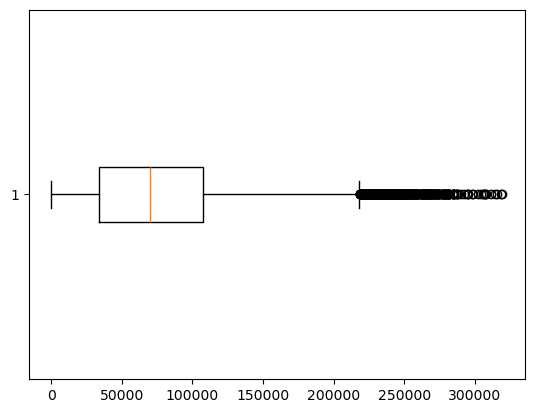

In [18]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)

In [19]:
# outlier_data=visa_df['prevailing_wage'][con3]
# outlier_list1=list(outlier_data)
# outlier_list1
# visa_df['prevailing_wage'].replace(outlier_list,Median_list,inplace=True)
# visa_df['prevailing_wage'][con3]

In [20]:
visa_df['prevailing_wage'].iloc[13:]

13       107196.03
14       220081.73
15        74108.02
16         3706.79
17        16132.61
           ...    
25475     77092.57
25476    279174.79
25477    146298.85
25478     86154.77
25479     70876.91
Name: prevailing_wage, Length: 25467, dtype: float64

In [21]:
visa_df['prevailing_wage'][con3]

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x240923ee190>,
 'caps': [<matplotlib.lines.Line2D at 0x240923ef850>,
 'boxes': [<matplotlib.lines.Line2D at 0x240923ed4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x240923f8c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x240923f9710>],
 'means': []}

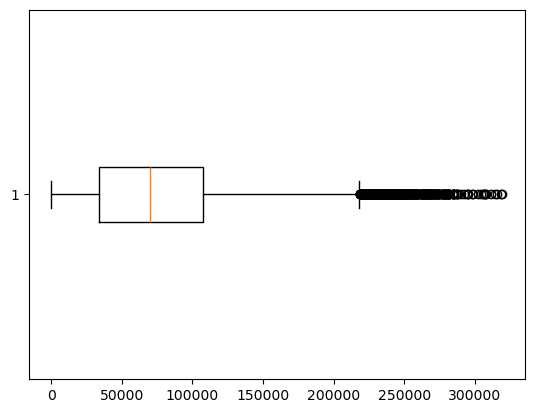

In [22]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)

In [23]:
len(visa_df['prevailing_wage'][con3])

427

In [24]:
a=visa_df[visa_df['prevailing_wage']>211339.84875]
a


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25259,EZYV25260,Asia,Bachelor's,Y,N,1530,2007,South,218094.61,Year,Y,Certified
25463,EZYV25464,Asia,High School,N,N,444,1838,Midwest,213189.36,Year,Y,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [25]:
# outliers_list3=[]
# for i in visa_df['prevailing_wage']:
#     if i>ub:
#         outliers_list3.append(i)
# outliers_list3
# median_list2=[round(Median,2) for _ in range(len(outliers_list3))]
# visa_df['prevailing_wage'].replace(outliers_list3,median_list2,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2409245a1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2409245ba50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24092459710>],
 'medians': [<matplotlib.lines.Line2D at 0x24092460fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24092461a50>],
 'means': []}

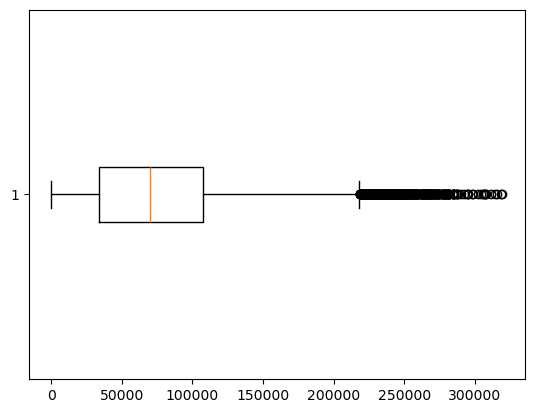

In [26]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)

- or behaviour

  - suppose we take two individual conditons
 
  - if any one true the final becomes true

- and behaviour

  - suppose we take two individual conditions
 
  - both conditions should be true then the final is true

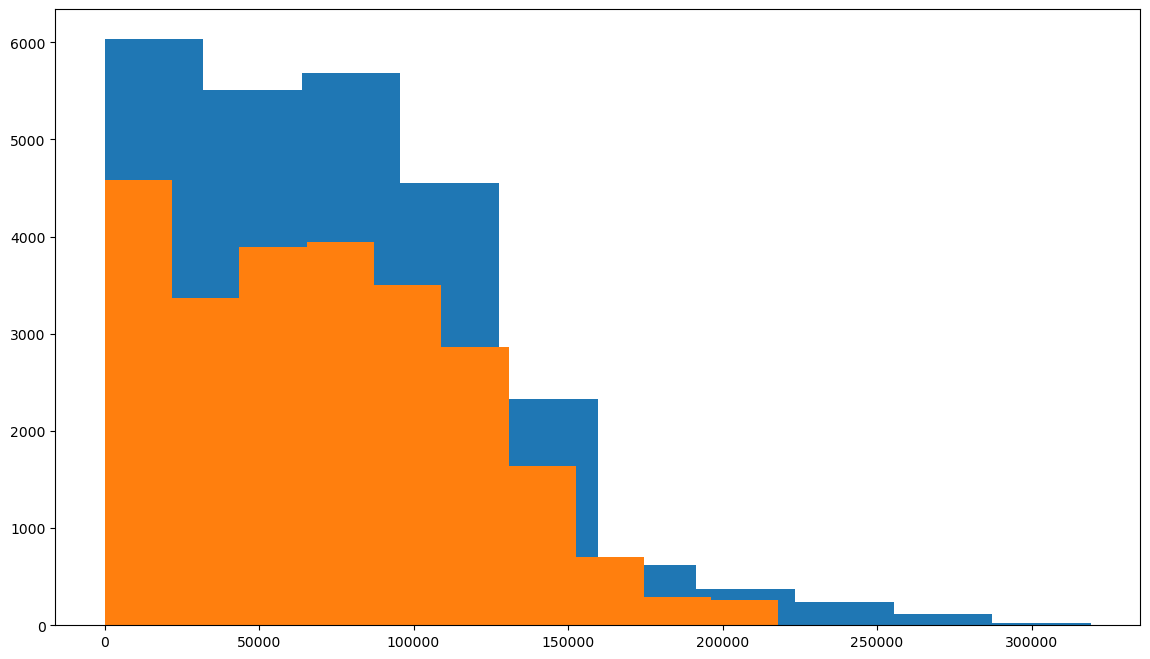

In [27]:
wage_data=non_outlier_df['prevailing_wage']
wage_data_non_outlier=visa_df['prevailing_wage']
plt.figure(figsize=(14,8))
plt.hist(wage_data_non_outlier)
plt.hist(wage_data)
plt.show()

**How to deal outliers**

- 1. we can drop outliers

     - dropping outliers is easy task but not recommonded
    
     - id we drop the outliers means we are dropping the row
    
     - which means we are dropping other columns also
    
     - may be lose some important information from other column
    
     - but in industry if outliers percentage less than or equal to 2% then we can drop it
    
     - the number of outliers in pwage is 427
    
     - the number of observations ia 25480
    
     - the percentage is 1.67 2hich is less than 2%
    
- 2. fill with median value
     
     - we alredy know that outliers does not affect by median
    
     - so it is the best practise to fill the outliers with median
    
- 3. capping or flooring

     - insted of filling with median we can fill with certain values
    
     - outliers which are less than lower bound fill with lower bound

     - outliers which are greater than upper bound fill with upper bound

- **Isolation forest**

  - is ml used to find the outliers and anamolies

In [28]:
non_outlier_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

**Fill with median value**

**np.where**

- in numpy we have method called where

- it takes three arguments

    - 1. confition
   
    - 2. value if condition is True
   
    - 3. value if condition is False
        

- it is applicable for only binary means if and else

{'whiskers': [<matplotlib.lines.Line2D at 0x24092bf5950>,
 'caps': [<matplotlib.lines.Line2D at 0x24092bf7150>,
 'boxes': [<matplotlib.lines.Line2D at 0x24092bf4e50>],
 'medians': [<matplotlib.lines.Line2D at 0x24092c00610>],
 'fliers': [<matplotlib.lines.Line2D at 0x24092c01190>],
 'means': []}

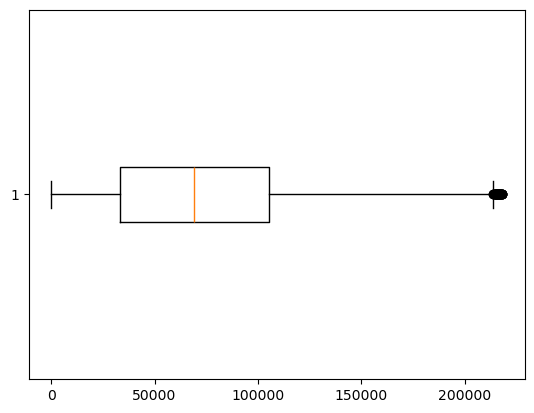

In [29]:
list1=[]
for value in wage_data:
    if value<lb or value>ub:
        median=wage_data.median()
        list1.append(median)
    else:
        list1.append(value)
# print(list1)
plt.boxplot(x=list1,vert=False)

In [30]:
dict1={'sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [31]:
# Q1 : i want to replace marks with 1 which are greater than 100
list2=[]
for i in df.marks:
    if i>100:
        list2.append(1)
    else:
        list2.append(i)
df['marks']=list2
df

,sub,marks
0,DS,100
1,DE,1
2,CS,1


In [32]:
dict1={'sub':['DS','DE','CS'],
   'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,DS,100
1,DE,200
2,CS,300


In [33]:
# np.where(condition,true value,false value)
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,sub,marks
0,DS,100
1,DE,1
2,CS,1


In [34]:
# wage_data=visa_df['prevailing_wage']
# con1=wage_data<lb
# con2=wage_data>ub
# con3=con1|con2
# Median_val=wage_data.median()
# l=np.where(con3,Median_val,wage_data)
# visa_df['prevailing_wage_updated']=l
# visa_df['prevailing_wage_updated']
# plt.figure(figsize=(10,5))
# plt.subplot(2,2,1)
# plt.hist(visa_df['prevailing_wage_updated'])
# plt.subplot(2,2,2)
# plt.boxplot(visa_df['prevailing_wage_updated'],vert=False)
# plt.subplot(2,2,3)
# plt.hist(visa_df['prevailing_wage'])
# plt.subplot(2,2,4)
# plt.boxplot(visa_df['prevailing_wage'],vert=False)

**Bi-varint analysis**

- we already seen uni varient analysis

- we perform the categorical column analysis

  - frequency table (value count)
 
  - bar chart
 
  - relative frequency table (value count normalized form)
 
  - pie chart

- we perform the numerical column analysis

  - histogram
 
  - distributon plot
 
  - box plot
 
  - outliers analysis
 
  - filling the outliers
 
- now we will do categorical - categorical analysis

- numerical - numerical analysis

- categorical - numerical analysis

- numerical - categorical analysis

**Categorical - categorical analysis**

- lets consider 2 columns

    - continent
    
    - case status

In [35]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [36]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task-1**

- find the certified observation continent

- find the denied observations continent wise

In [37]:
visa_df['continent'][visa_df['case_status']=='Certified'].value_counts()

continent
Asia             11012
Europe            2957
North America     2037
South America      493
Africa             397
Oceania            122
Name: count, dtype: int64

In [38]:
visa_df['continent'][visa_df['case_status']=='Denied'].value_counts()

continent
Asia             5849
North America    1255
Europe            775
South America     359
Africa            154
Oceania            70
Name: count, dtype: int64

In [39]:
import os
try: # we use try except to avoid below shown error
    main_path=os.getcwd()
    new_folder='bi_varient'
    bi_varient_path=os.path.join(main_path,new_folder)
    os.makedirs(bi_varient_path)
except Exception as e:
    print(e)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\DELL\\OneDrive\\Documents\\NareshIT\\EDA\\bi_varient'


In [40]:
# step-1 : make a first condition == 'Asia'
# step-2 : make the second condition case_status=='Certified'
# step-3 : make the third condition con1|con2
# step-4 : then retrive the dataframe and take count
con1=visa_df['continent']=="Asia"
con2=visa_df['case_status']=='Certified'
con3=con1&con2
len(visa_df[con3])

11012

In [41]:
count_list=[]
for i in visa_df['continent'].unique():
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1&con2
    count_list.append(len(visa_df[con3]))
count_list

[11012, 397, 2037, 2957, 493, 122]

In [42]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [43]:
df1=pd.DataFrame(zip(visa_df['continent'].unique(),count_list),columns=['continent','certified'])
df1

,continent,certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [66]:
visa_df['continent'][visa_df['case_status']=='Certified'].value_counts()

continent
Asia             11012
Europe            2957
North America     2037
South America      493
Africa             397
Oceania            122
Name: count, dtype: int64

In [67]:
visa_df['continent'][visa_df['case_status']=='Denied'].value_counts()

continent
Asia             5849
North America    1255
Europe            775
South America     359
Africa            154
Oceania            70
Name: count, dtype: int64

In [44]:
count_list1=[]
for i in visa_df['continent'].unique():
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Denied'
    con3=con1&con2
    count_list1.append(len(visa_df[con3]))
count_list1

[5849, 154, 1255, 775, 359, 70]

In [45]:
df2=pd.DataFrame(zip(visa_df['continent'].unique(),count_list1),columns=['continent','Denied'])
df2

,continent,Denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [46]:
df1.to_csv(f'{bi_varient_path}\Certified.csv',index=False)
df2.to_csv(f'{bi_varient_path}\Denied.csv',index=False)

In [47]:
df3=pd.DataFrame(zip(visa_df['continent'].unique(),count_list,count_list1),columns=['continent','certified','denied'])
df3

,continent,certified,denied
0,Asia,11012,5849
1,Africa,397,154
2,North America,2037,1255
3,Europe,2957,775
4,South America,493,359
5,Oceania,122,70


In [48]:
df4=pd.DataFrame(zip(count_list,count_list1),index=visa_df['continent'].unique(),columns=['certified','denied'])
df4.to_csv(f'{bi_varient_path}\certi_deni.csv')
df4

,certified,denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [49]:
visa_df['continent'][visa_df['case_status']=='Certified'].value_counts()

continent
Asia             11012
Europe            2957
North America     2037
South America      493
Africa             397
Oceania            122
Name: count, dtype: int64

**Cross-tab**

- the above data frame we can make by using a method : **cross-tab**

- it is available in pandas

- it takes 2 arguments

    - index
    
    - column

- in above dataframe index is continent

- in above dataframe data column is case_status

**Categorical vs categorical**

In [50]:
pd.crosstab(visa_df['continent'],visa_df['case_status'])

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

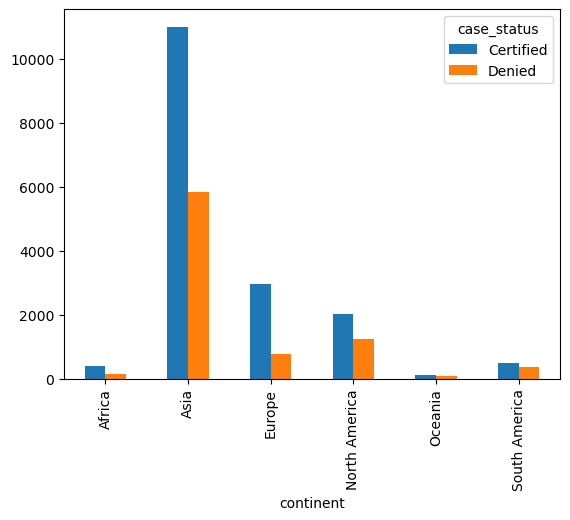

In [51]:
idx_column=visa_df['continent']
col_column=visa_df['case_status']
df4=pd.crosstab(idx_column,col_column)
df4.to_csv(f'{bi_varient_path}\crosstab.csv',index=False)
df4.plot(kind='bar')

<Axes: >

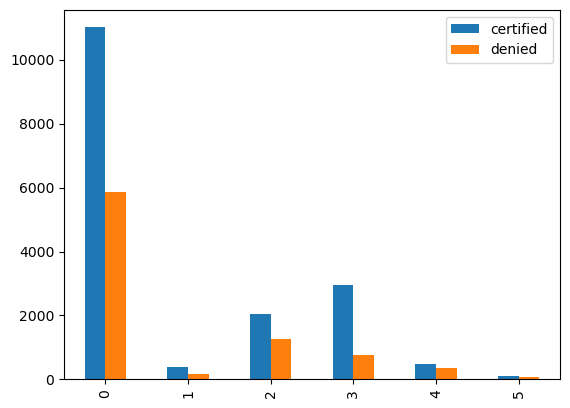

In [52]:
df3.plot(kind='bar')

**multivarient analysis**

- 

In [53]:
df5=pd.crosstab(visa_df['continent'],[visa_df['case_status'],visa_df['education_of_employee']])
df5

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

In [54]:
df6=pd.crosstab(visa_df['continent'],[visa_df['education_of_employee'],visa_df['case_status']])
df6

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

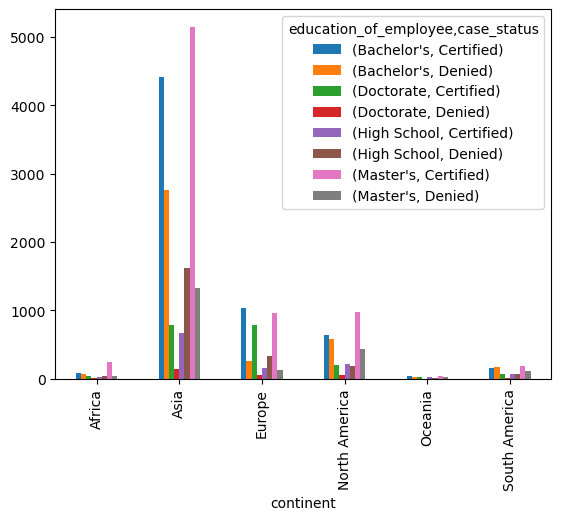

In [55]:
df6.plot(kind='bar')

<Axes: xlabel='continent'>

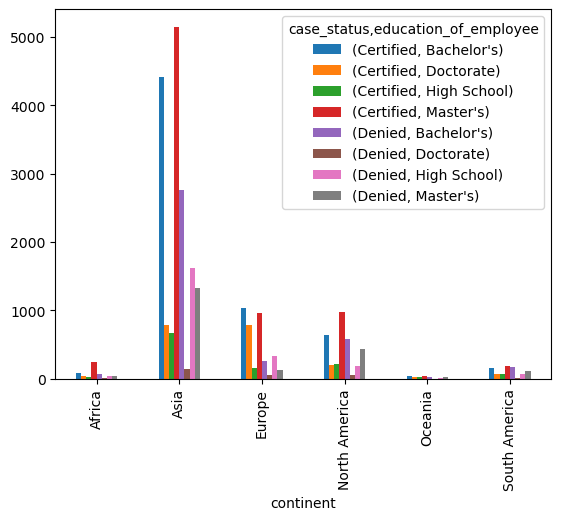

In [56]:
df5.plot(kind='bar')

In [57]:
visa_df['continent'][visa_df['case_status']=='Certified'].value_counts()

continent
Asia             11012
Europe            2957
North America     2037
South America      493
Africa             397
Oceania            122
Name: count, dtype: int64

**Numerical vs numerical**

- to understand numerical column relation we need to plot scatter plots

- scatter plots gives the relation between two numerical columns

- bar chart and pie chart and histogram and scatter plots

- scatter plots under matplotlib package

- **plt.scatter**

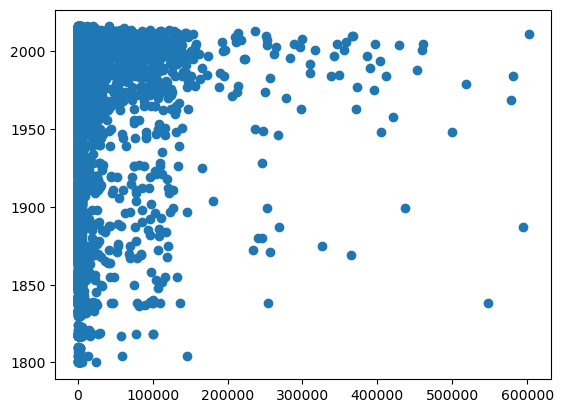

In [58]:
plt.scatter('no_of_employees','yr_of_estab',data=visa_df)

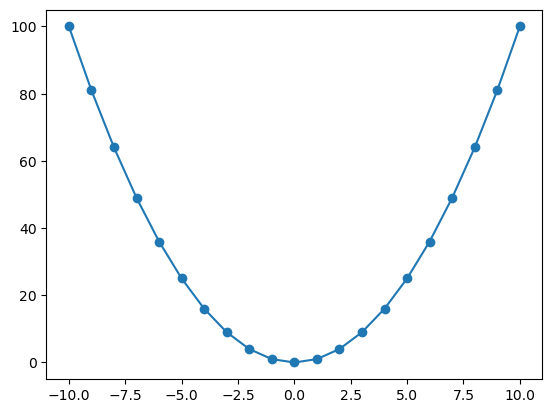

In [59]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

Text(0, 0.5, 'prevailing_wage')

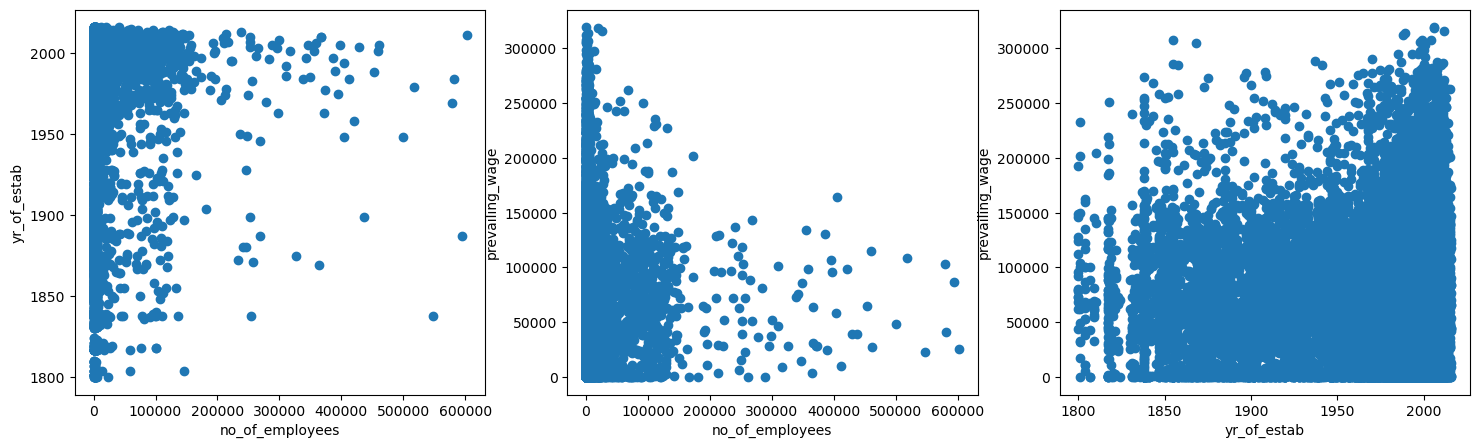

In [60]:
# step-1 : read one numerical column
# step-2 : read second numerical column 
# and apply the scatter plot
x=visa_df['no_of_employees']
y=visa_df['yr_of_estab']
z=visa_df['prevailing_wage']
plt.figure(figsize=(18,5))
plt.subplot(1,3,1).scatter(x,y)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
plt.subplot(1,3,2).scatter(x,z)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
plt.subplot(1,3,3).scatter(y,z)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')

- implement the co variance function

- co-variance vs co-relation

    - co-variance will tell about the column have relation or not
    
    - co-variance will explain about relation status
    
        - positive
        
        - negative
        
        - no-relation

    - co-relation tells about how much relation between two variables
 
    - it is denoted by 'r'
 
    - r varies from -1 to 1
 
    - -1 to 0 is indicates negative relation
 
    - 0 to 1 indicates positive relation
 
    - 0 indicates no-relation

In [61]:
# method name is corr
visa_df['prevailing_wage'].corr(visa_df['yr_of_estab'])

0.012341759885686265

In [62]:
visa_df.select_dtypes(exclude='object').corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [63]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat map**

- heat map is one of the important visualization method

- to show the matrix form of values

- it is under **seaborn** package

- in every matrix highest value and lowest values are available

- heat map will give color visualization

- aslo it provides color bars ,which color indicates which value

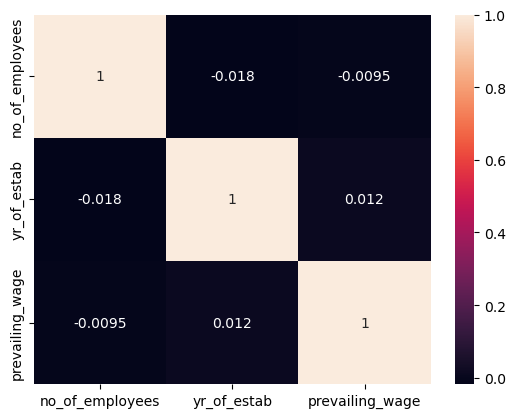

In [64]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

- by seeing graph we might not say the relation status

- it is best practice to get the percentage of relation using co-relation

- all 3 columns having approximatly zero percentage of relation

- which indicates all the columns having no relation

- no relation means independent each other

- in ML we expexct the input column should be independant each other

- corr method gives matrix views

- we have 3 columns 3*3 totao 9 fileds

- if a data has 20 columns then 20*20 total 400 fields

- thats why always go with heat map visualiztion